In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd

# 解析XML文件
tree = ET.parse('conf/behaviors.xml')
root = tree.getroot()


In [3]:

# 命名空间
ns = {'Mascot': 'http://www.group-finity.com/Mascot'}

# 提取所有行为
behaviors = root.findall('.//Mascot:Behavior', ns)
behavior_names = [behavior.get('Name') for behavior in behaviors if behavior.get('Name')]

# 创建行为名称到索引的映射
behavior_to_index = {name: i for i, name in enumerate(behavior_names)}


In [6]:

# 初始化Markov矩阵
n = len(behavior_names)
markov_matrix = np.zeros((n, n))

# 填充Markov矩阵
for behavior in behaviors:
    current_behavior = behavior.get('Name')
    print()
    print(current_behavior)
    if current_behavior:
        next_behaviors = behavior.findall('.//Mascot:BehaviorReference', ns)
        total_frequency = sum(int(nb.get('Frequency')) for nb in next_behaviors)
        if total_frequency > 0:
            for next_behavior in next_behaviors:
                next_behavior_name = next_behavior.get('Name')
                print("next", next_behavior_name)
                frequency = int(next_behavior.get('Frequency'))
                markov_matrix[behavior_to_index[current_behavior], behavior_to_index[next_behavior_name]] = frequency / total_frequency

# 将Markov矩阵导出为DataFrame并展示
markov_df = pd.DataFrame(markov_matrix, index=behavior_names, columns=behavior_names)
# print(markov_df)

# 保存为CSV文件
markov_df.to_csv('markov_matrix.csv')



ChaseMouse
next SitAndFaceMouse

SitAndFaceMouse
next SitAndFaceMouse
next SitAndSpinHead

SitAndSpinHead
next SitAndFaceMouse

Fall

Dragged

Thrown

PullUp

Divided

StandUp

SitDown
next SitWhileDanglingLegs
next LieDown

SitWhileDanglingLegs

LieDown
next SitDown
next CrawlAlongIECeiling
next CrawlAlongWorkAreaFloor

SplitIntoTwo

HoldOntoWall

FallFromWall

HoldOntoCeiling

FallFromCeiling

WalkAlongWorkAreaFloor

RunAlongWorkAreaFloor

CrawlAlongWorkAreaFloor
next LieDown

WalkLeftAlongFloorAndSit

WalkRightAlongFloorAndSit

GrabWorkAreaBottomLeftWall

GrabWorkAreaBottomRightWall

WalkLeftAndSit

WalkRightAndSit

WalkAndGrabBottomLeftWall

WalkAndGrabBottomRightWall

JumpFromBottomOfIE

PullUpShimeji

ClimbHalfwayAlongWall

ClimbAlongWall

ClimbAlongCeiling

WalkAlongIECeiling

RunAlongIECeiling

CrawlAlongIECeiling
next LieDown

SitOnTheLeftEdgeOfIE

SitOnTheRightEdgeOfIE

JumpFromLeftEdgeOfIE

JumpFromRightEdgeOfIE

WalkLeftAlongIEAndSit

WalkRightAlongIEAndSit

WalkLeftAlongI

In [ ]:
#转存为excel
markov_df.to_excel('markov_matrix.xlsx')

In [ ]:
# ! pip install networkx

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


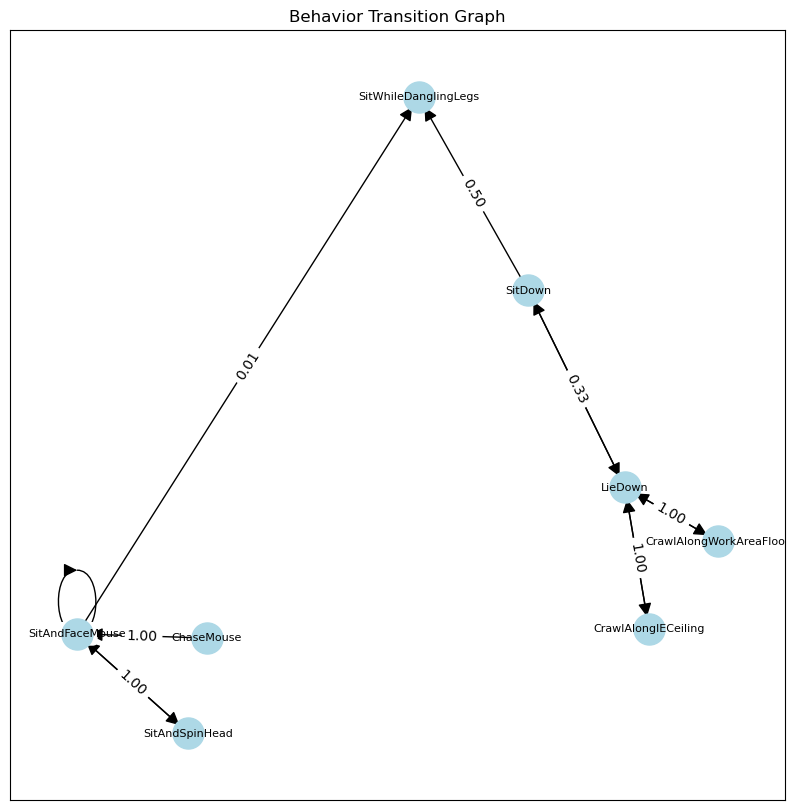

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 找出有出边的节点
non_isolated_indices = np.where(markov_matrix.sum(axis=1) > 0)[0]
non_isolated_behaviors = [behavior_names[i] for i in non_isolated_indices]

# 创建有向图
G = nx.DiGraph()

# 添加节点（仅添加有出边的节点）
for behavior in non_isolated_behaviors:
    G.add_node(behavior)

# 添加带权重的边
for i in non_isolated_indices:
    current_behavior = behavior_names[i]
    for j, next_behavior in enumerate(behavior_names):
        weight = markov_matrix[i, j]
        if weight > 0:
            G.add_edge(current_behavior, next_behavior, weight=weight)

# 绘制图形
pos = nx.spring_layout(G)  # 使用spring布局
plt.figure(figsize=(10, 10))

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# 绘制边
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=8)

# 绘制边标签（权重）
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 显示图形
plt.title('Behavior Transition Graph')
plt.show()
